**SuperStore**

In [3]:
#Include Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [5]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [6]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
print(df.shape)
print(df.columns)

(9994, 13)
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [13]:
#checking if any col has null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
#checking if any duplicate rows are there
df.duplicated().sum()

0

In [14]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [16]:
# find out null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [17]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [18]:
# categorical data and numerical data
num_df = df[['Sales','Quantity','Discount','Profit']]

cat_df = df[['Ship Mode','Segment','City','State','Region','Category','Sub-Category']]

In [20]:
#unique features
print(df.Segment.unique())
print(df.Category.unique())
print(df['Ship Mode'].unique())

['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']
['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [21]:
#as we have only 1 country so its not important to have country and postal code
df = df.drop(['Country','Postal Code'],axis=1)
df.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


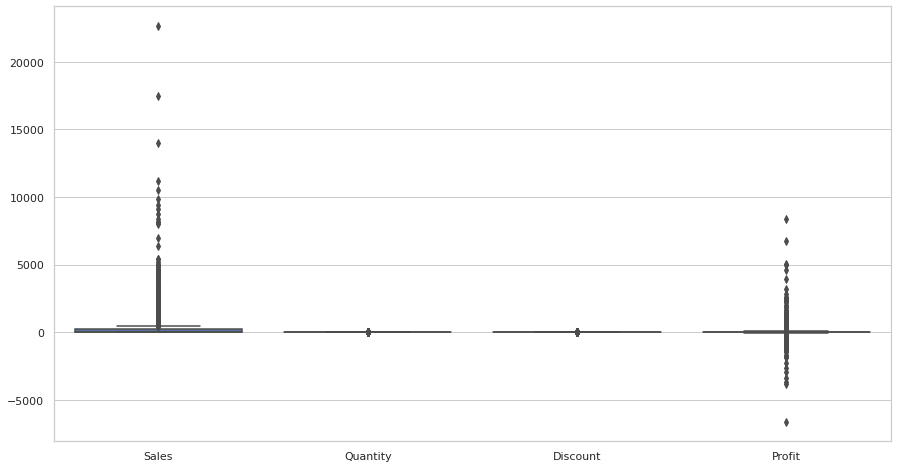

In [22]:
#finding outliers
plt.figure(figsize=[15,8])
sns.set(style="whitegrid")
sns.boxplot(data=num_df)
plt.show()

* As we can see there are outliers in col sales and profit.
* We need to remove them.

In [24]:
df['z-score'] = (df.Sales-df.Sales.mean())/df.Sales.std()
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051002
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.804512
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345553
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.166272
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.333131


In [26]:
df[df['z-score']>3]
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051002
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.804512
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345553
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.166272
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.333131


In [28]:
df[df['z-score']<-3]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score


In [27]:
df.shape

(9977, 12)

In [30]:
df_no_outliers = df[df['z-score']<3]
df_no_outliers.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051002
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.804512
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345553
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.166272
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.333131


In [32]:
#checking if outliers are removed or not 
new_df = df_no_outliers
new_df.shape

(9850, 12)

# Numerical Categorical Data

**For numerical data**

* Made histograms to understand distributions
* Corrplot
* Pivot table comparing survival rate across numeric variables

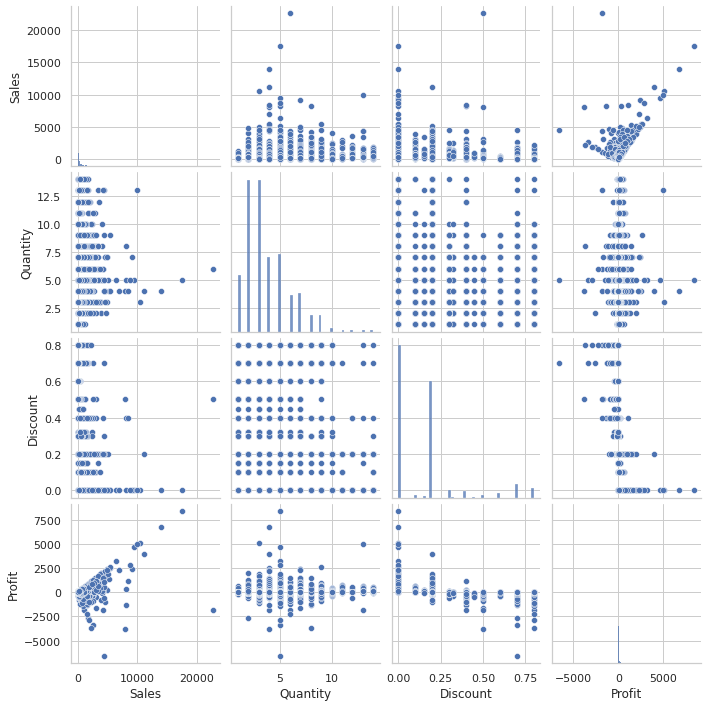

In [35]:
sns.pairplot(num_df)

* Highest Correlation is between Sales, Profit and Qunatity

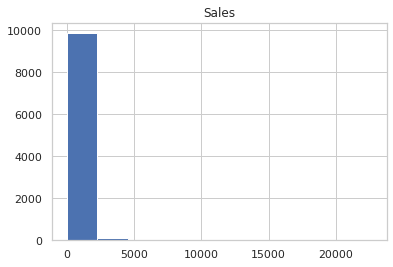

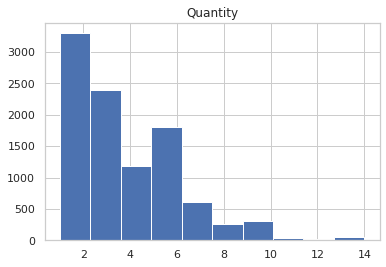

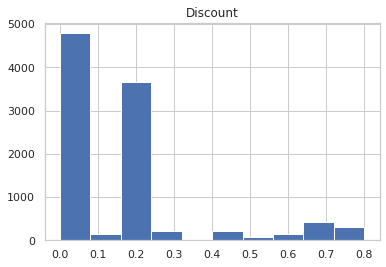

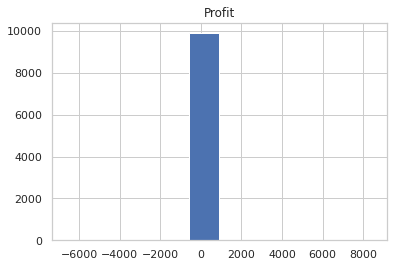

In [33]:
# for numerical data
for x in num_df.columns:
  plt.hist(num_df[x])
  plt.title(x)
  plt.show()

## HeatMap for Numerical Categorical Data

**Heatmap**
* Correlation ranges from -1 to +1
* Values closer to zero means there is no linear trend between the two variables.
* The close to 1 the correlation is the more positively correlated they are, stronger relationship.


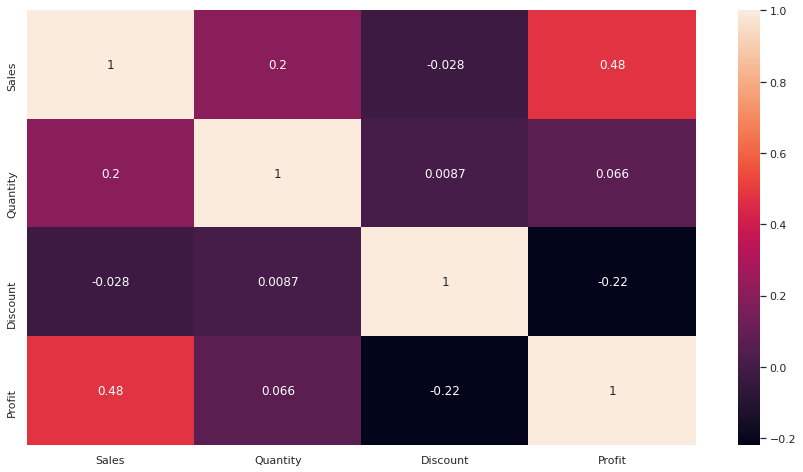

In [34]:
#checking correlation between col
f,ax = plt.subplots(figsize=(15,8))
sns.heatmap(num_df.corr(),annot=True)

# Top 10 States and City having highest Sales and Profit and Discount

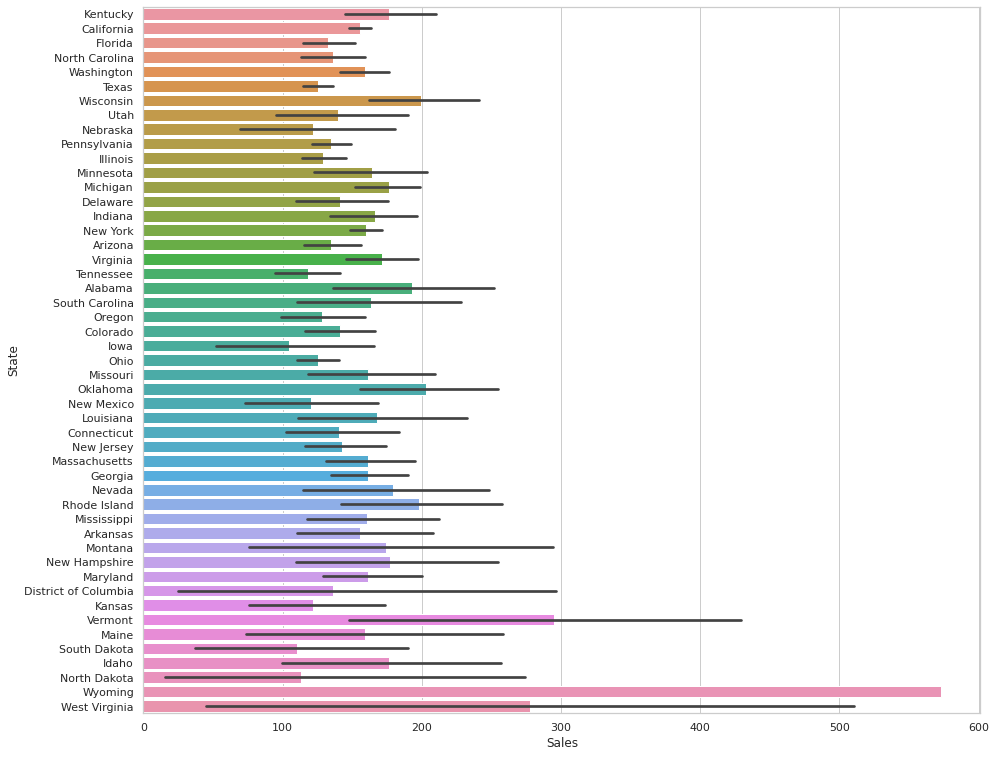

In [ ]:
#state vs sales
plt.figure(figsize=[15,13])
ax = sns.barplot(x='Sales', y='State', data=df)

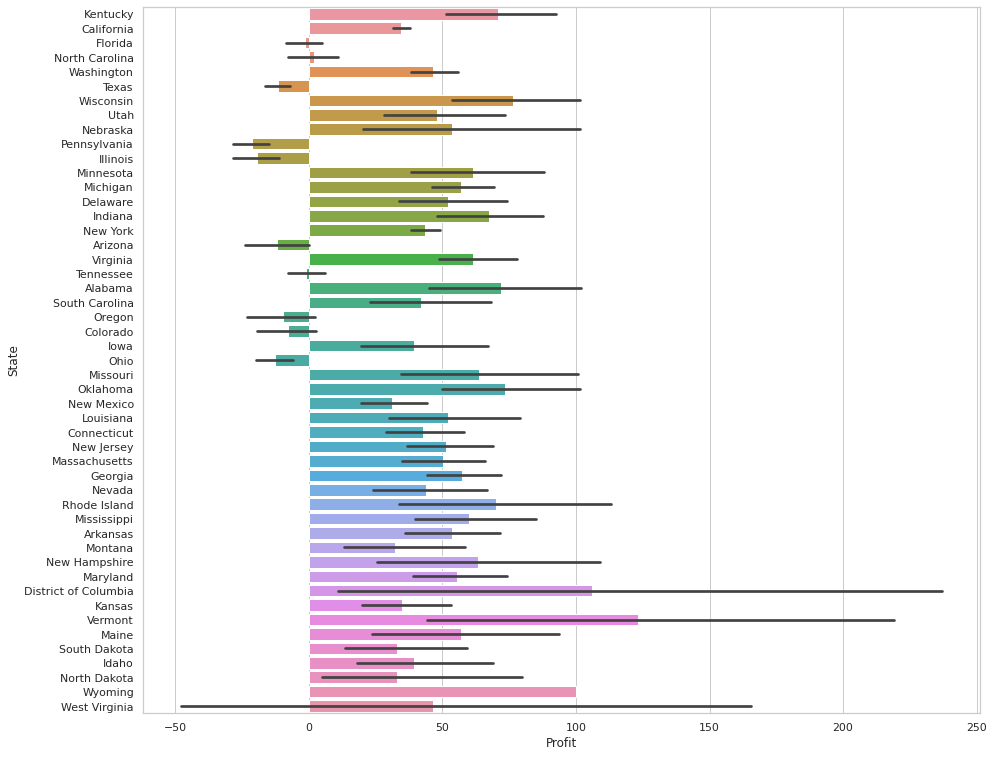

In [194]:
#state vs Profit
plt.figure(figsize=[15,13])
ax = sns.barplot(x='Profit', y='State', data=df)

In [11]:
df_top_10_states_p = df.groupby("State")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
print(df_top_10_states_p.head(10))


         State      Profit
3   California  76381.3871
30    New York  74038.5486
45  Washington  33402.6517
20    Michigan  24463.1876
44    Virginia  18597.9504
12     Indiana  18382.9363
9      Georgia  16250.0433
15    Kentucky  11199.6966
21   Minnesota  10823.1874
6     Delaware   9977.3748


* District of Columbia, Vermont, Wyoming states are generating **highest profit**s. 
* States like Arizona, California, colorado, Connecticut, Delaaware, Florida, North Carolina, Texas, pennsylvayia, Illinois, Tennesse, Oregon are generating ** lowest profit**. Hence focus has to be given in such States.

In [312]:
df_top_10_cities_p = df.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
print(df_top_10_cities_p.head(10))

df_top_10_cities_d = df.groupby("City")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
print("\n" , df_top_10_cities_d.head(10))

              City      Profit
329  New York City  39934.8107
266    Los Angeles  26544.4140
452        Seattle  18916.8467
438  San Francisco  16521.1321
123        Detroit   8200.3235
437      San Diego   6377.1960
94        Columbus   5909.1601
407       Richmond   5567.2486
93        Columbia   5304.0100
194      Henderson   4911.8609

               City  Discount
374   Philadelphia    173.50
207        Houston    139.54
80         Chicago    117.90
109         Dallas     55.50
266    Los Angeles     54.70
329  New York City     50.40
94        Columbus     38.20
216   Jacksonville     35.35
438  San Francisco     33.80
452        Seattle     27.40


#Region

## Region vs Sales/ Proft/ Discount/ Quantity

In [294]:
def region(y):
  plt.figure(figsize=[5,5])
  ax = sns.barplot(y=y, x='Region', data=df, palette="Blues")

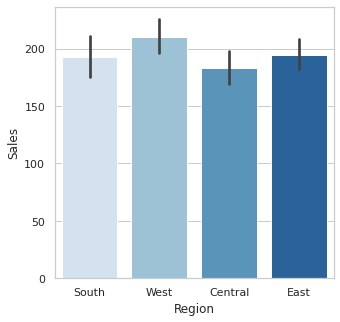

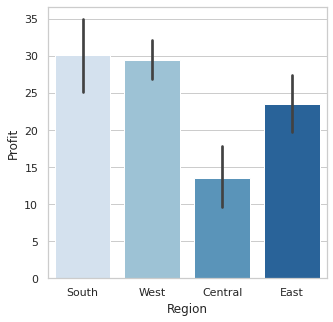

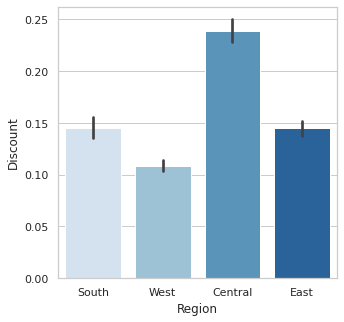

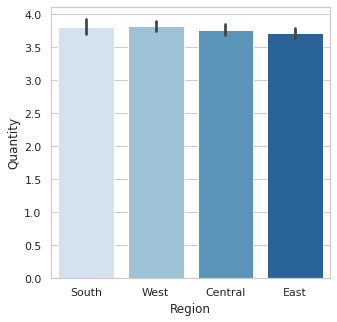

In [295]:
region('Sales')
region('Profit')
region('Discount')
region('Quantity')

* Sales is highest in west region having profit slightly less than south region. 
* Sales is highest in west region but discount is best in central region.

## Overall Profit and Overall Discount on Region

    Region  Overall_Profit  Overall_Discount
0     West      93461.7208            345.40
1    South      48146.1257            232.35
2     East      66167.7651            407.20
3  Central      31046.6475            549.14


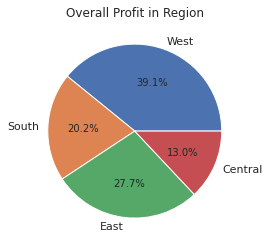

In [292]:
overall_prof = df.groupby(['Region']).Profit.sum().sort_index(ascending=False).reset_index()
overall_disc = df.groupby(['Region']).Discount.sum().sort_index(ascending=False).reset_index()
merge = pd.merge(overall_prof,overall_disc,on="Region").rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'})
print(merge)

fig,ax1 = plt.subplots()
ax1.pie(merge['Overall_Profit'], labels=['West','South','East','Central'],
        autopct='%1.1f%%')
ax1.set_title('Overall Profit in Region')
plt.show()

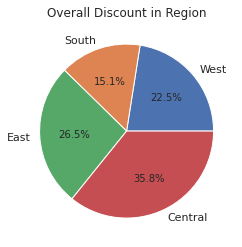

In [293]:
fig,ax2 = plt.subplots()
ax2.pie(merge['Overall_Discount'], labels=['West','South','East','Central'],
        autopct='%1.1f%%')
ax2.set_title('Overall Discount in Region')
plt.show()


* From the above two pie charts overall loss is highets in central region as huge amount of discount is there on products. 
* west region has a great profit as much as double as discount.

# Comparing differrent region with Sales,Profit,Discount,Quantity on different Category of Products.


In [240]:
# Region vs Sales/Proft/Discount/Quantity vs category
def region(y):
  plt.figure(figsize=[12,6])
  ax = sns.barplot(y=y, x='Region', data=df, hue="Category", palette="Blues")

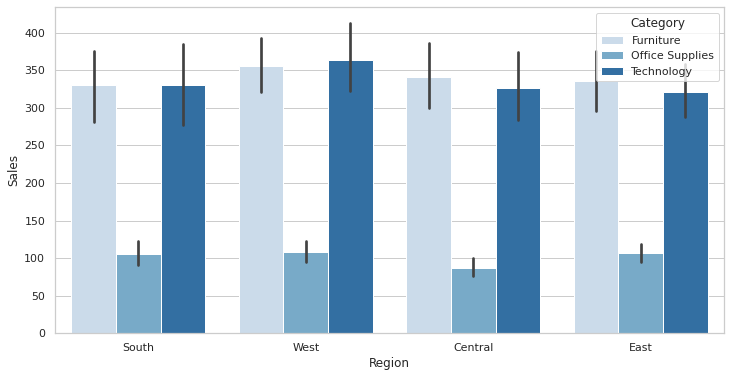

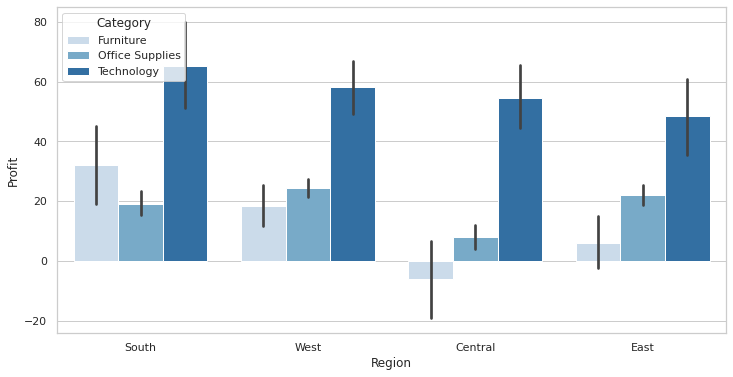

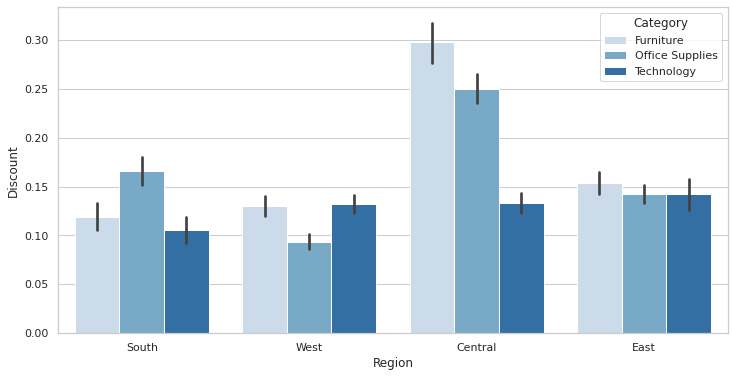

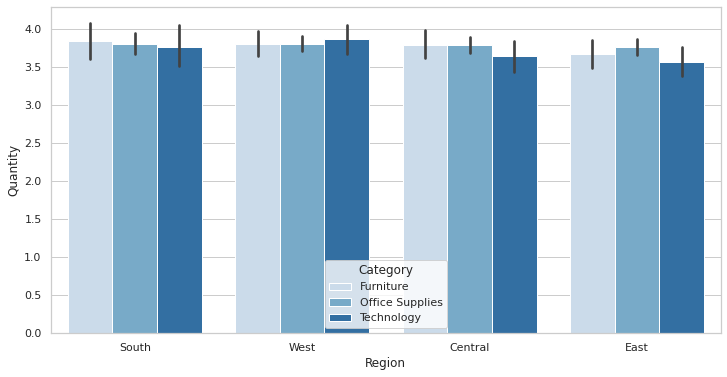

In [242]:
region('Sales')
region('Profit')
region('Discount')
region('Quantity')

* overall performance of Furniture and Technology is best but office supplies has a very poor performance.
* The west Region is leading Technology and furniture has a great & least performance in west region & south region. 

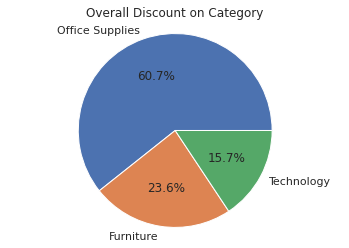

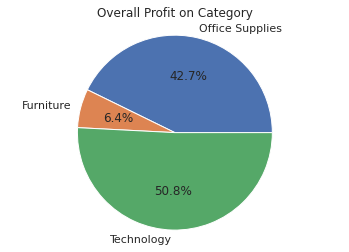

In [42]:
gp3 = df.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
gp4 = df.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge1 = pd.merge(gp3, gp4, on='Category')
merge1.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge1

Category = 'Office Supplies','Furniture', 'Technology'
fig, ax1 = plt.subplots()
ax1.pie(merge1["Overall_Discount"], labels=Category, autopct='%1.1f%%')
ax1.set_title('Overall Discount on Category')
ax1.axis('equal')
plt.show()

fig, ax2 = plt.subplots()
ax2.pie(merge1["Overall_Profit"], labels=Category, autopct='%1.1f%%')
ax2.set_title('Overall Profit on Category')
ax2.axis('equal')
plt.show()

* Here we can visualize that "Office Supplies" has suffered the highest amount of profit and Discount as well but on the other hand "Technology" category has lowest discount among all categories but gaining good amount of profit. 
* we are facing loss in "Furniture" category.

# sub-category

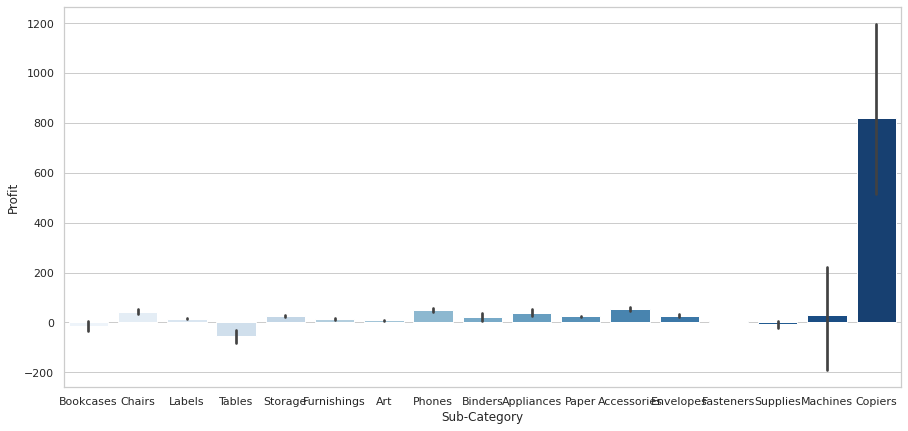

In [52]:
#sub-category vs profit
plt.figure(figsize=[15,7])
sns.barplot(x="Sub-Category", y="Profit", data=df, palette="Blues")

* Copiers have the highest profit
* but Tables, Bookcases and Machine are going into losses.
* Need to take steps for the losses.

In [45]:
df_top_10_sub_cat_p = df.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
print(df_top_10_sub_cat_p.head(10))

df_top_10_sub_cat_d = df.groupby("Sub-Category")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
print("\n", df_top_10_sub_cat_d.head(10))

   Sub-Category      Profit
6       Copiers  55617.8249
13       Phones  44515.7306
0   Accessories  41936.6357
12        Paper  33944.2395
3       Binders  30228.0003
5        Chairs  26567.1278
14      Storage  21278.8264
1    Appliances  18138.0054
9   Furnishings  13052.7230
7     Envelopes   6964.1767

    Sub-Category  Discount
3       Binders    566.20
13       Phones    137.40
9   Furnishings    132.40
5        Chairs    104.70
12        Paper    101.80
16       Tables     83.35
1    Appliances     77.60
14      Storage     63.20
0   Accessories     60.80
2           Art     59.60


* having higest profit in sub-category there is no problem

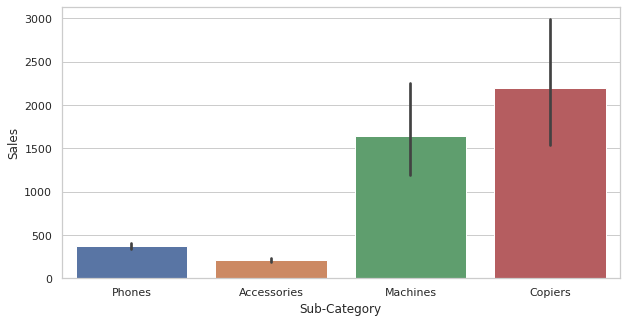

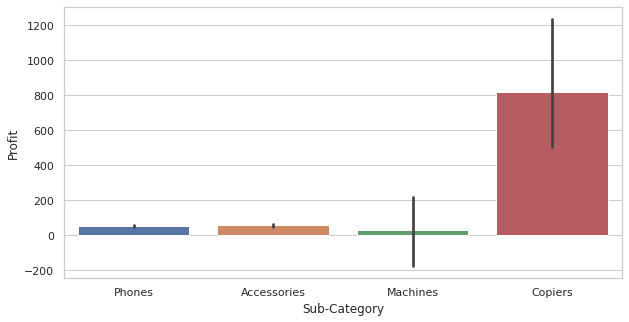

In [59]:
df_tech=df[(df['Category']=="Technology")]
plt.figure(figsize=[10,5])
ax = sns.barplot(x="Sub-Category", y="Sales",data=df_tech)

plt.figure(figsize=[10,5])
ax = sns.barplot(x="Sub-Category", y="Profit", data=df_tech)


* Copiers have the higest profit

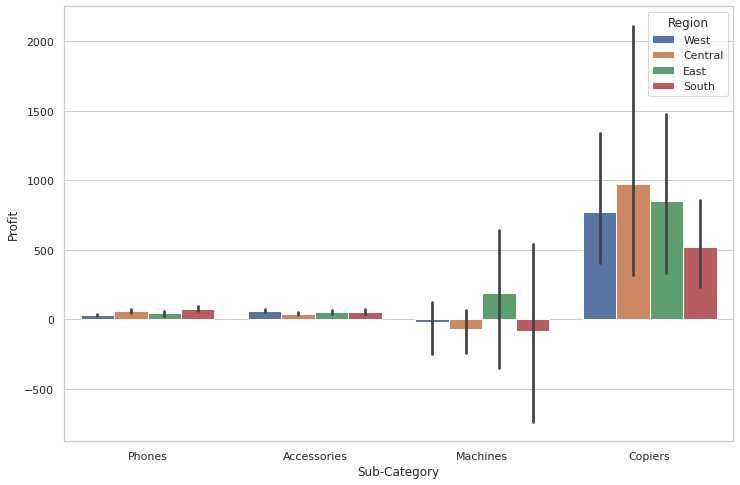

In [60]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=df_tech)

* Machines is going in losses in all region except west region

# segment vs ship mode vs profit

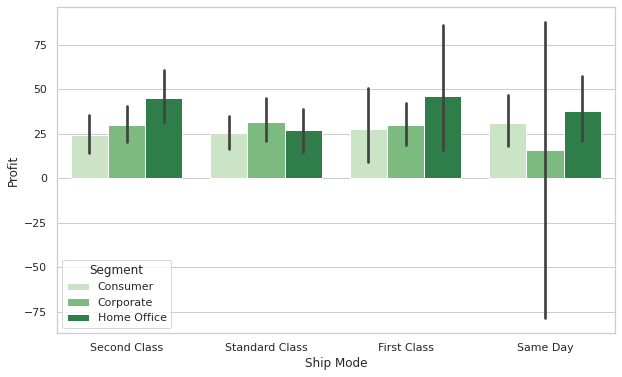

In [46]:
# ship mode vs profit vs Segment
plt.figure(figsize=[10,6])
ax = sns.barplot(x='Ship Mode', y='Profit', hue="Segment", data=df, palette="Greens")

* People generally prefered second class for home office
* for corporate they prefered second class service
* Consumer prefered same day service

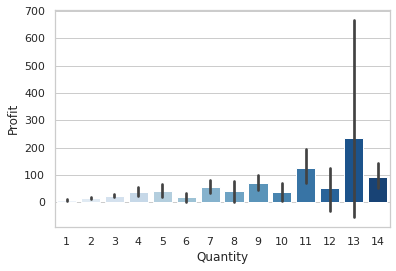

In [47]:
#Quantity vs profit
sns.barplot(x="Quantity", y="Profit", data=df, palette="Blues")

# Conclusion

* Correlation Matrix showing positive relationship between Profit & Sales, Quantity & Sales.
* Company offering more Discount on Office Suppliers & furniture Category.
* In case of Categories, Technology is always leading in terms of Sales and Profit
* In the Central Rregion company(Store) giving lots of discount but the Output is very less in quantity.
* Company Provides highest Quantity for Office Suppliers but Sales are not that much good enough,Quantity should be minimized and provide it to the Furniture category instead of Office Suppliers.